In [207]:
import os
import nibabel as nib
import glob
from PIL import Image
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt 
import cv2 as cv
from IPython.display import clear_output

In [293]:
def get_images(row,p_id, randid, fig, side):
    pid = str(int(p_id)).zfill(2)
    rand_id = str(int(randid)).zfill(2)
    if(side=="left"):
        slide_id = rand_id+"cl"
        head1st = "head1stL"
        body_1st = "body1stL"
        tail1st = "tail1stL"
        tail_last = "lastL"
    else:
        slide_id = rand_id+"cr"
        head1st = "head1stR"
        body_1st = "body1stR"
        tail1st = "tail1stR"
        tail_last = "lastR"
    slide_id_name = slide_id +"-s"
    path = "/data/scratch/chirag24/HIA/data/"+pid+"/"+slide_id+"/"+slide_id_name
    head_1_img = cv.imread(path+str(int(row[head1st])) + ".png")
    head_last_img = cv.imread(path+str(int(row[body_1st])-1) + ".png")
    head_middle_img = cv.imread(path+str(int((int(row[head1st]) + int(row[body_1st])-1)/2)) + ".png")
    
    body_1_img = cv.imread(path+str(int(row[body_1st])) + ".png")
    body_last_img = cv.imread(path+str(int(row[tail1st])-1) + ".png")
    body_middle_img = cv.imread(path+str(int((int(row[body_1st]) + int(row[tail1st])-1)/2)) + ".png")
    
    tail_1_img = cv.imread(path+str(int(row[tail1st])) + ".png")
    tail_last_img = cv.imread(path+str(int(row[tail_last])) + ".png")
    tail_middle_img = cv.imread(path+str(int((int(row[tail1st]) + int(row[tail_last]))/2)) + ".png")
    images_arr = [head_1_img, head_middle_img, head_last_img, body_1_img, body_middle_img, body_last_img, tail_1_img, tail_middle_img, tail_last_img]
    image_titles = ["head 1st slide-"+str(row[head1st]), "head middle slide", "head last slide", "body 1st slide-"+str(row[body_1st]), "body middle slide", "body last slide","tail 1st slide-"+str(row[tail1st]), "tail middle slide", "tail last slide"]
    
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for x in range(1,len(images_arr)+1):
        ax = fig.add_subplot(3, 3, x)
        ax.set_title(image_titles[x-1])
        ax.imshow(images_arr[x-1])

In [294]:
path = "/data/scratch/chirag24/HIA/"

In [295]:
df = pd.read_csv(path+"slide_data.csv", skiprows=4)
var = float('nan')
df.dropna(how='all')
df.head()

,subjectID_wo_17,subjectID_1-20,SNR_code,averages,less_than_16_scans,rand_ID,head1stR,body1stR,tail1stR,lastR,head1stL,body1stL,tail1stL,lastL
0,0.0,1.0,1.0,4.0,0,8.0,151.0,136.0,113.0,103.0,151.0,134.0,113.0,103.0
1,0.0,1.0,2.0,9.0,0,16.0,151.0,136.0,113.0,103.0,151.0,134.0,113.0,103.0
2,0.0,1.0,3.0,16.0,0,43.0,151.0,136.0,113.0,103.0,151.0,134.0,113.0,103.0
3,1.0,2.0,1.0,4.0,0,11.0,150.0,137.0,118.0,109.0,150.0,137.0,118.0,109.0
4,1.0,2.0,2.0,9.0,0,56.0,150.0,137.0,118.0,109.0,150.0,137.0,118.0,109.0


subject id = 2.0 random id = 2.0


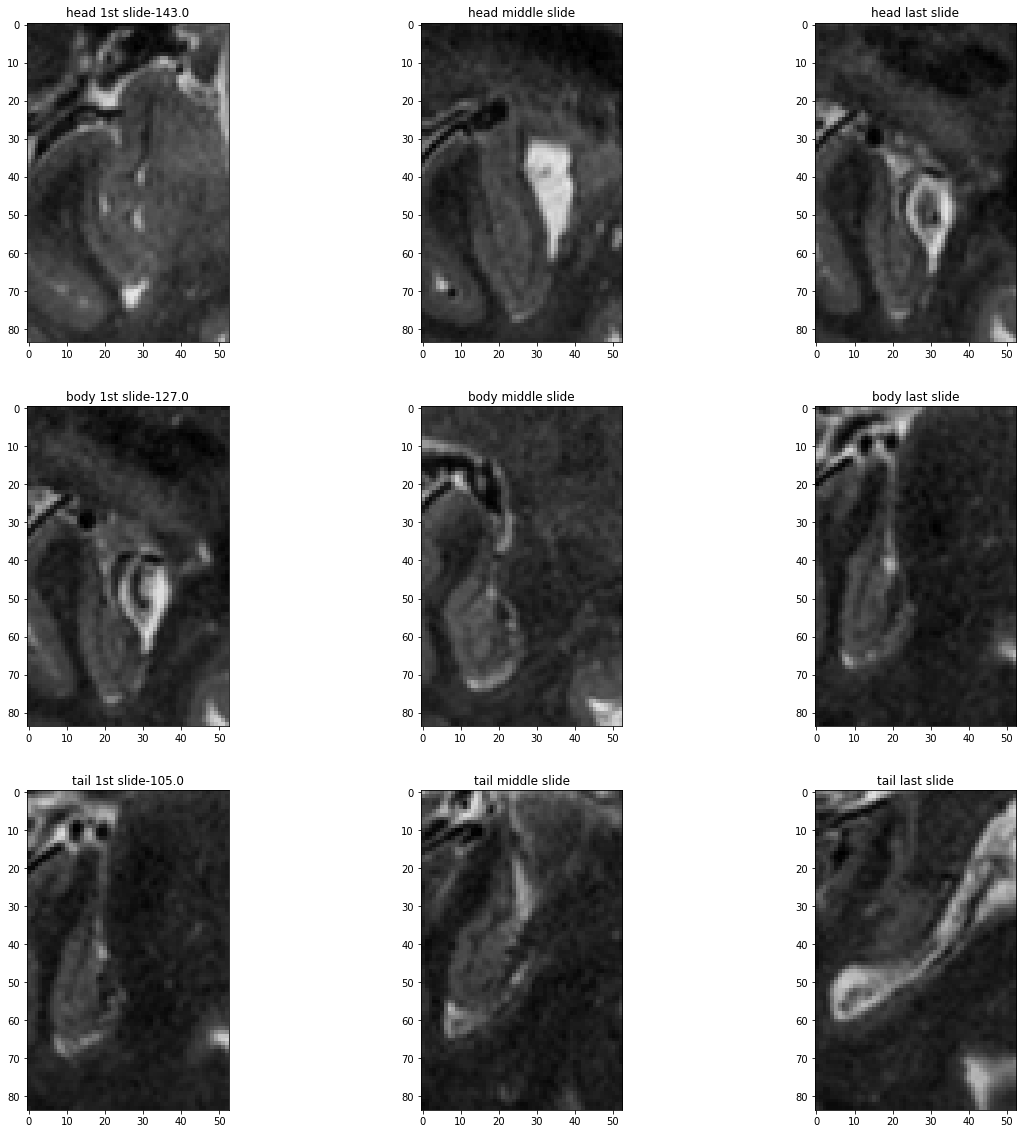

In [296]:
fig = plt.figure(figsize=(20, 20))
row = df.iloc[7]
print("subject id = "+str(row["subjectID_wo_17"])+" random id = "+ str(row["rand_ID"]))
get_images(row,row["subjectID_wo_17"],row["rand_ID"],fig,"left")


In [1]:
import sys
print(sys.path)


['/data/user/chirag24/HIA', '/cm/local/apps/cuda/libs/current/pynvml', '/home/chirag24/.conda/envs/venv/lib/python38.zip', '/home/chirag24/.conda/envs/venv/lib/python3.8', '/home/chirag24/.conda/envs/venv/lib/python3.8/lib-dynload', '', '/home/chirag24/.conda/envs/venv/lib/python3.8/site-packages', '/home/chirag24/.conda/envs/venv/lib/python3.8/site-packages/IPython/extensions', '/home/chirag24/.ipython']
